In [9]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

df_ag = pd.read_csv("input_ag.csv")
df_bg = pd.read_csv("input_bg.csv")
df_cg = pd.read_csv("input_cg.csv")
df_ab = pd.read_csv("input_ab.csv")
df_ac = pd.read_csv("input_ac.csv")
df_bc = pd.read_csv("input_bc.csv")
df_normal = pd.read_csv("input_normal.csv")

# Добавление категории
df_ag["category"] = "ag"
df_bg["category"] = "bg"
df_cg["category"] = "cg"
df_ab["category"] = "ab"
df_ac["category"] = "ac"
df_bc["category"] = "bc"
df_normal["category"] = "normal"

df = pd.concat([df_ag, df_bg, df_cg, df_ab, df_ac, df_bc, df_normal], ignore_index=True)

df.to_csv("input.csv", index=False)

Собранные данные

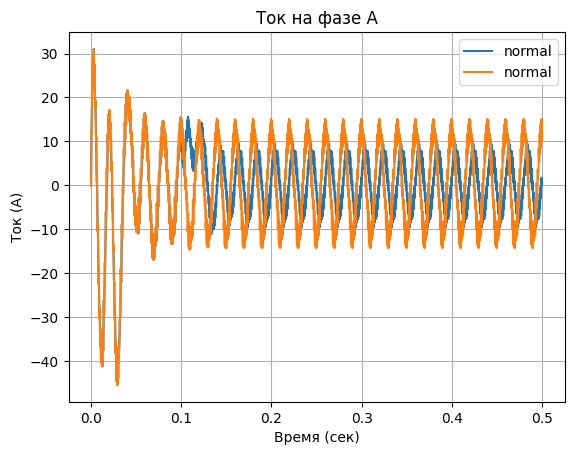

In [26]:

plt.plot(df_ab["time"], df_ab["ia"], label="normal")
plt.plot(df_normal["time"], df_normal["ia"], label="normal")
plt.legend()
plt.xlabel("Время (сек)")
plt.ylabel("Ток (А)")
plt.title("Ток на фазе A")
plt.grid(True)
plt.show()

In [ ]:
plt.plot(df_ag["time"], df_ag["ia"], label="ag-fault")
plt.plot(df_normal["time"], df_normal["ia"], label="normal")
plt.legend()
plt.xlabel("Время (сек)")
plt.ylabel("Ток (А)")
plt.title("Ток на фазе A")
plt.grid(True)
plt.show()

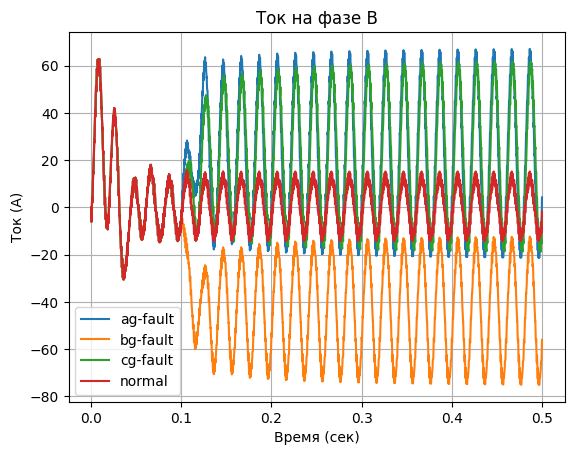

In [5]:
plt.plot(df_ag["time"], df_ag["ib"], label="ag-fault")
plt.plot(df_bg["time"], df_bg["ib"], label="bg-fault")
plt.plot(df_cg["time"], df_cg["ib"], label="cg-fault")
plt.plot(df_normal["time"], df_normal["ib"], label="normal")
plt.legend()
plt.xlabel("Время (сек)")
plt.ylabel("Ток (А)")
plt.title("Ток на фазе B")
plt.grid(True)
plt.show()

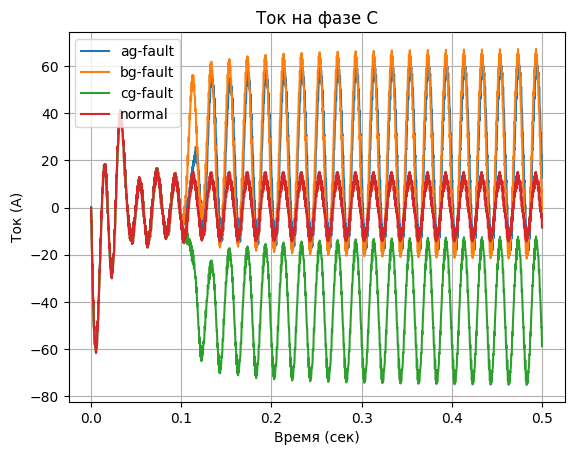

In [6]:
plt.plot(df_ag["time"], df_ag["ic"], label="ag-fault")
plt.plot(df_bg["time"], df_bg["ic"], label="bg-fault")
plt.plot(df_cg["time"], df_cg["ic"], label="cg-fault")
plt.plot(df_normal["time"], df_normal["ic"], label="normal")
plt.legend()
plt.xlabel("Время (сек)")
plt.ylabel("Ток (А)")
plt.title("Ток на фазе C")
plt.grid(True)
plt.show()

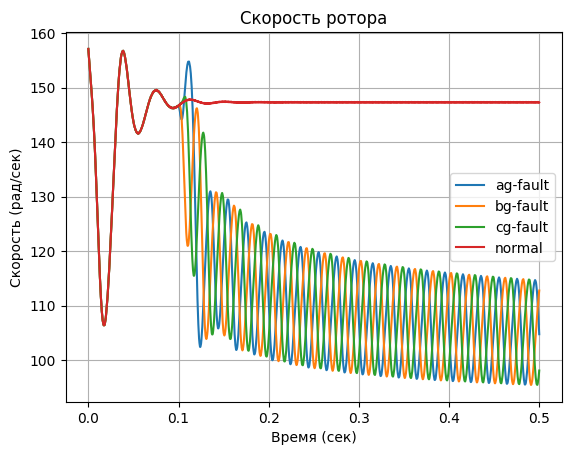

In [7]:
plt.plot(df_ag["time"], df_ag["speed"], label="ag-fault")
plt.plot(df_bg["time"], df_bg["speed"], label="bg-fault")
plt.plot(df_cg["time"], df_cg["speed"], label="cg-fault")
plt.plot(df_normal["time"], df_normal["speed"], label="normal")
plt.legend()
plt.xlabel("Время (сек)")
plt.ylabel("Скорость (рад/сек)")
plt.title("Скорость ротора")
plt.grid(True)
plt.show()

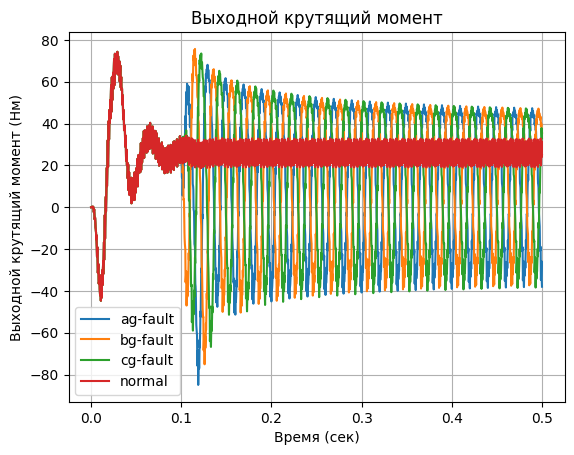

In [8]:
plt.plot(df_ag["time"], df_ag["te"], label="ag-fault")
plt.plot(df_bg["time"], df_bg["te"], label="bg-fault")
plt.plot(df_cg["time"], df_cg["te"], label="cg-fault")
plt.plot(df_normal["time"], df_normal["te"], label="normal")
plt.legend()
plt.xlabel("Время (сек)")
plt.ylabel("Выходной крутящий момент (Нм)")
plt.title("Выходной крутящий момент")
plt.grid(True)
plt.show()

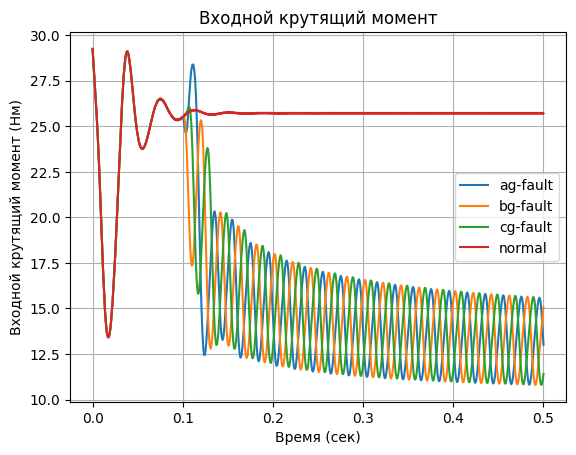

In [9]:
plt.plot(df_ag["time"], df_ag["tm"], label="ag-fault")
plt.plot(df_bg["time"], df_bg["tm"], label="bg-fault")
plt.plot(df_cg["time"], df_cg["tm"], label="cg-fault")
plt.plot(df_normal["time"], df_normal["tm"], label="normal")
plt.legend()
plt.xlabel("Время (сек)")
plt.ylabel("Входной крутящий момент (Нм)")
plt.title("Входной крутящий момент")
plt.grid(True)
plt.show()

In [10]:
df.describe() # распределение данных

,time,ia,ib,ic,speed,te,tm,iaf,ibf,icf,voltage
count,241836.000000,241836.000000,241836.000000,241836.000000,241836.000000,241836.000000,241836.000000,241836.000000,241836.000000,241836.000000,241836.000000
mean,0.250377,-0.492615,1.122589,-0.629974,124.418930,18.031255,18.800715,25.511005,25.558188,25.539546,426.351873
std,0.145409,31.281555,31.758136,31.542918,19.531967,27.896878,5.831602,12.298807,12.361656,12.386424,94.808052
min,0.000000,-75.325703,-75.115701,-75.194613,95.459871,-84.926845,10.801149,0.000000,0.000000,0.000000,0.000000
25%,0.122658,-16.029238,-14.524479,-15.519000,107.158227,1.456620,13.610664,12.319916,12.319693,12.319649,398.444531
50%,0.248980,-1.343397,-0.483517,-1.994327,117.655971,25.307127,16.408022,28.320702,28.236455,28.295310,474.958444
75%,0.377733,13.998995,16.610498,13.700169,147.246585,36.744654,25.699149,37.650487,37.717012,37.664785,474.995996
max,0.500000,66.905302,67.046226,67.256294,157.079633,75.699116,29.246105,42.181179,42.214035,42.192988,489.146437


In [220]:
df.isnull().sum() # нет ненулевых значений

time        0
ia          0
ib          0
ic          0
speed       0
te          0
tm          0
category    0
dtype: int64

In [12]:
df["category"].value_counts() # сбалансированные классы

category
6    60698
1    60673
0    60567
2    60466
5    60400
3    60394
4    60272
Name: count, dtype: int64

Проверим распределение выходной переменной по каждому из классов

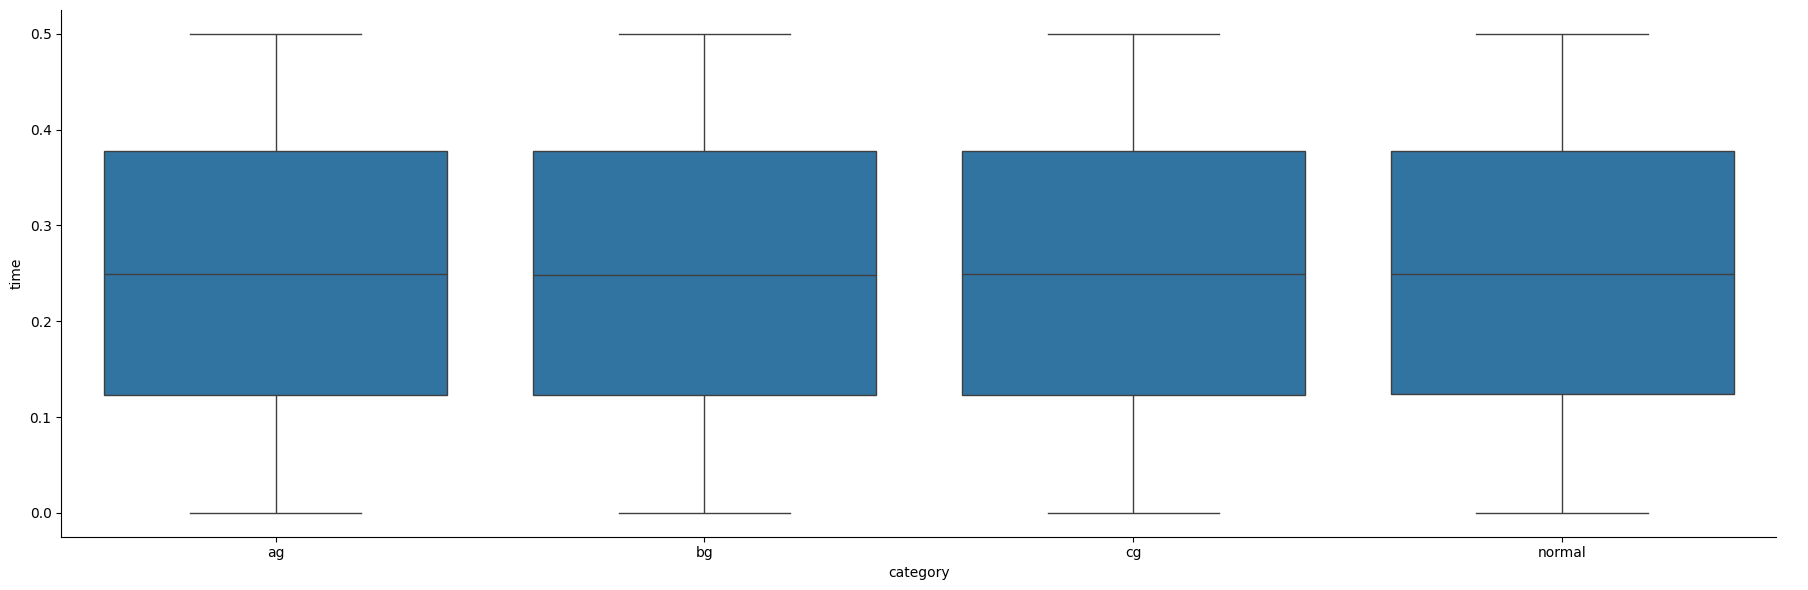

In [199]:
sns.catplot(data=df, x='category', y='time', kind='box', height=6, aspect=3)

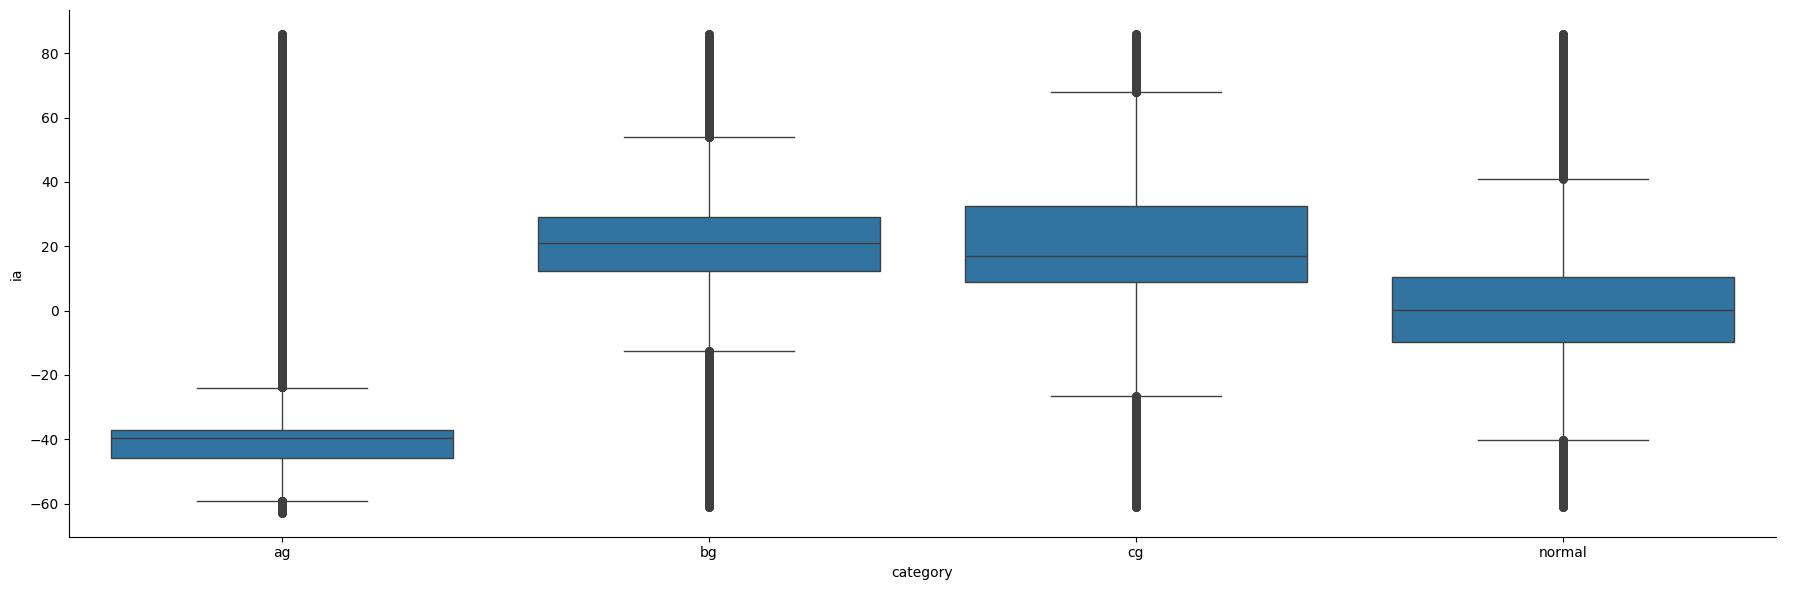

In [200]:
sns.catplot(data=df, x='category', y='ia', kind='box', height=6, aspect=3)

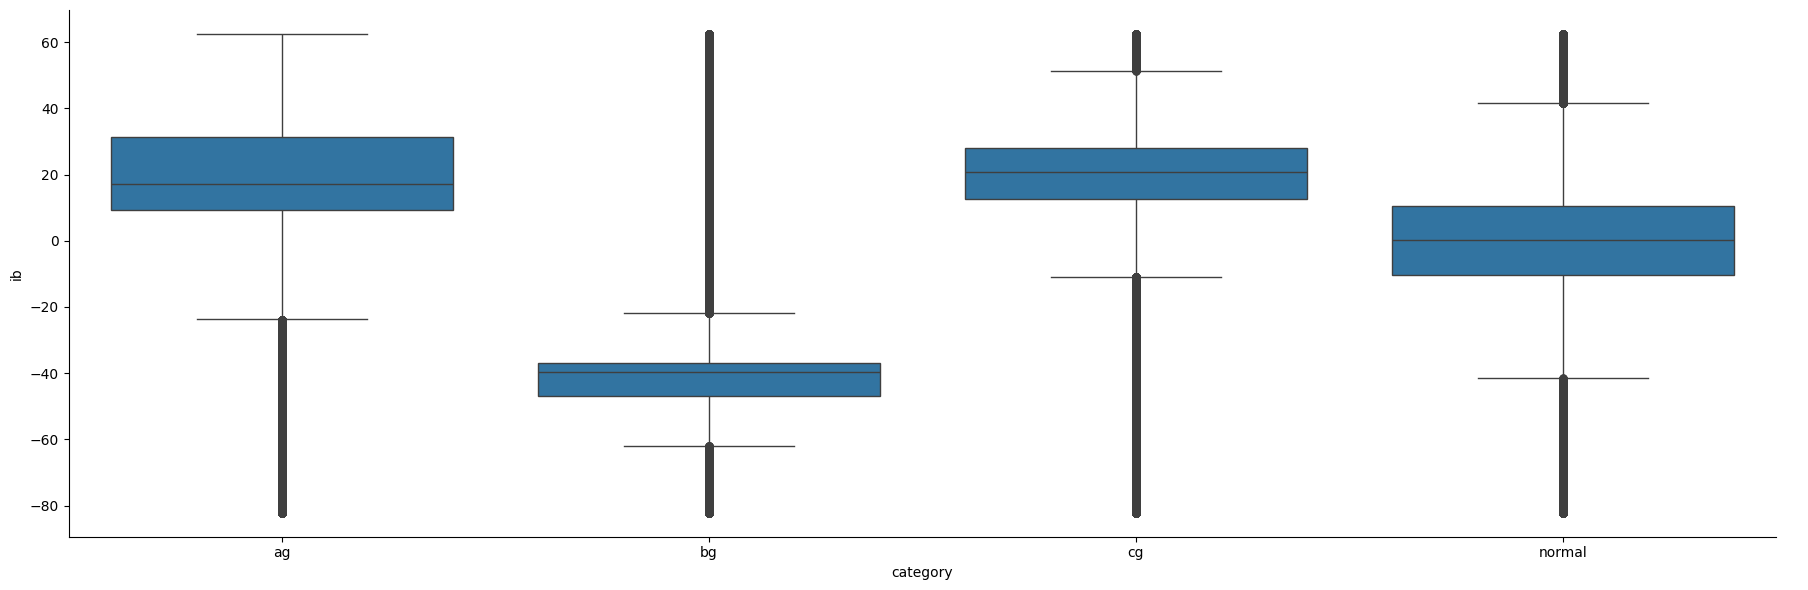

In [201]:
sns.catplot(data=df, x='category', y='ib', kind='box', height=6, aspect=3)

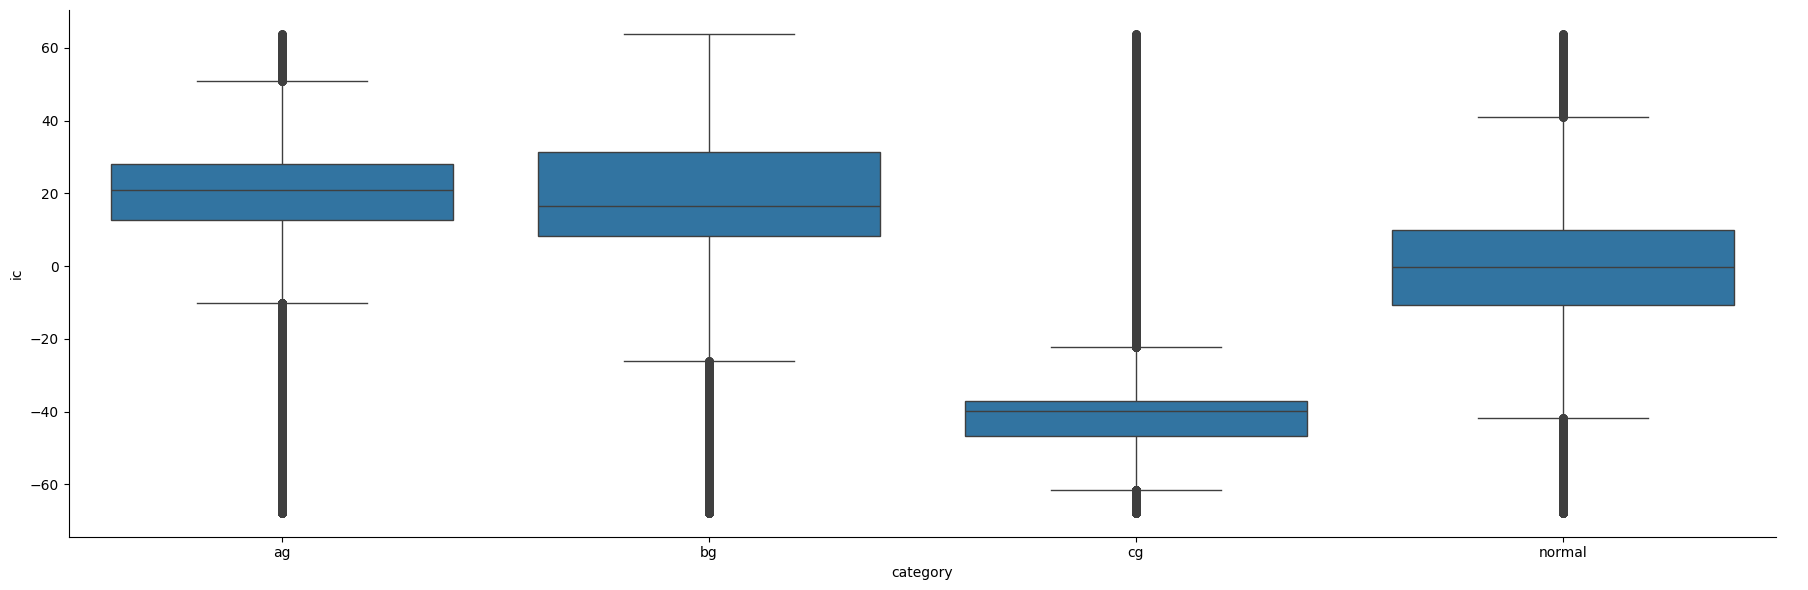

In [202]:
sns.catplot(data=df, x='category', y='ic', kind='box', height=6, aspect=3)

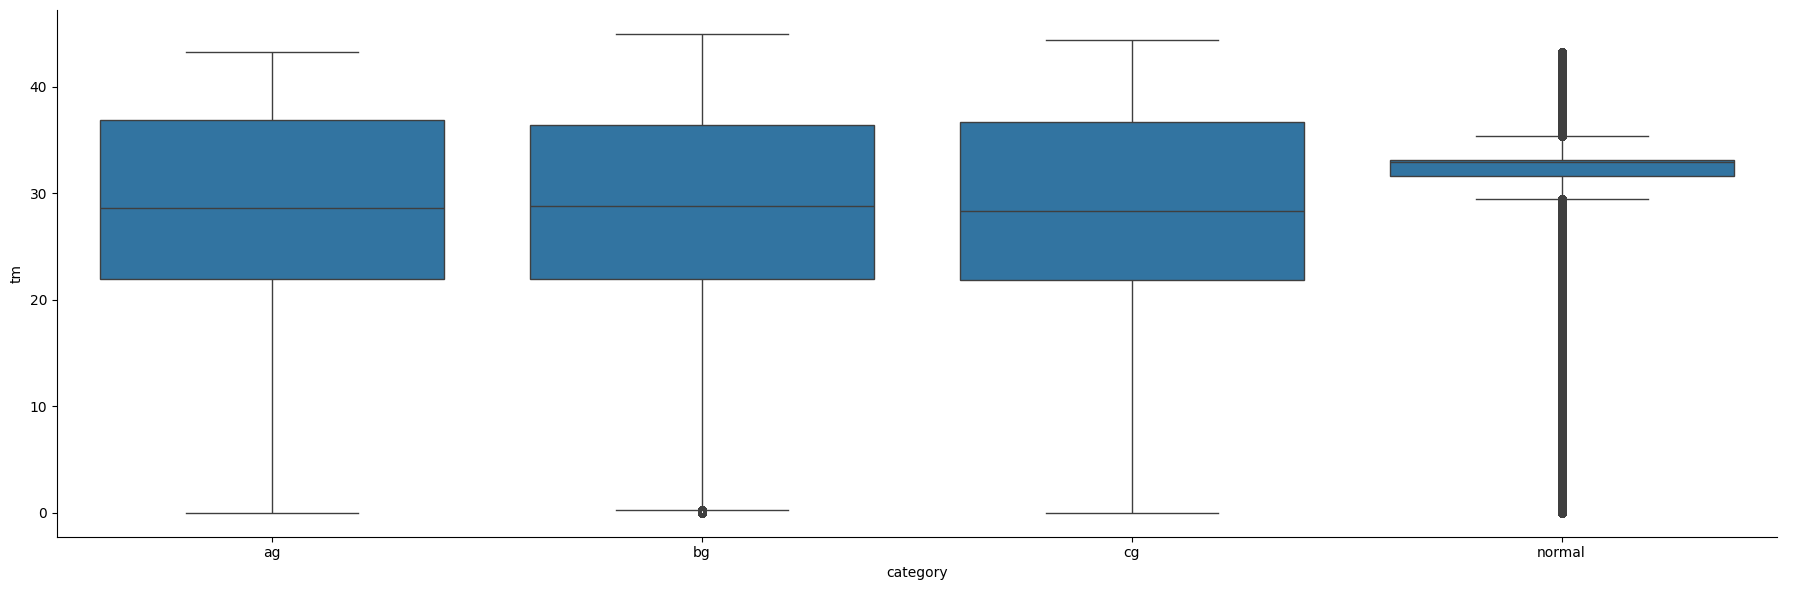

In [203]:
sns.catplot(data=df, x='category', y='tm', kind='box', height=6, aspect=3)

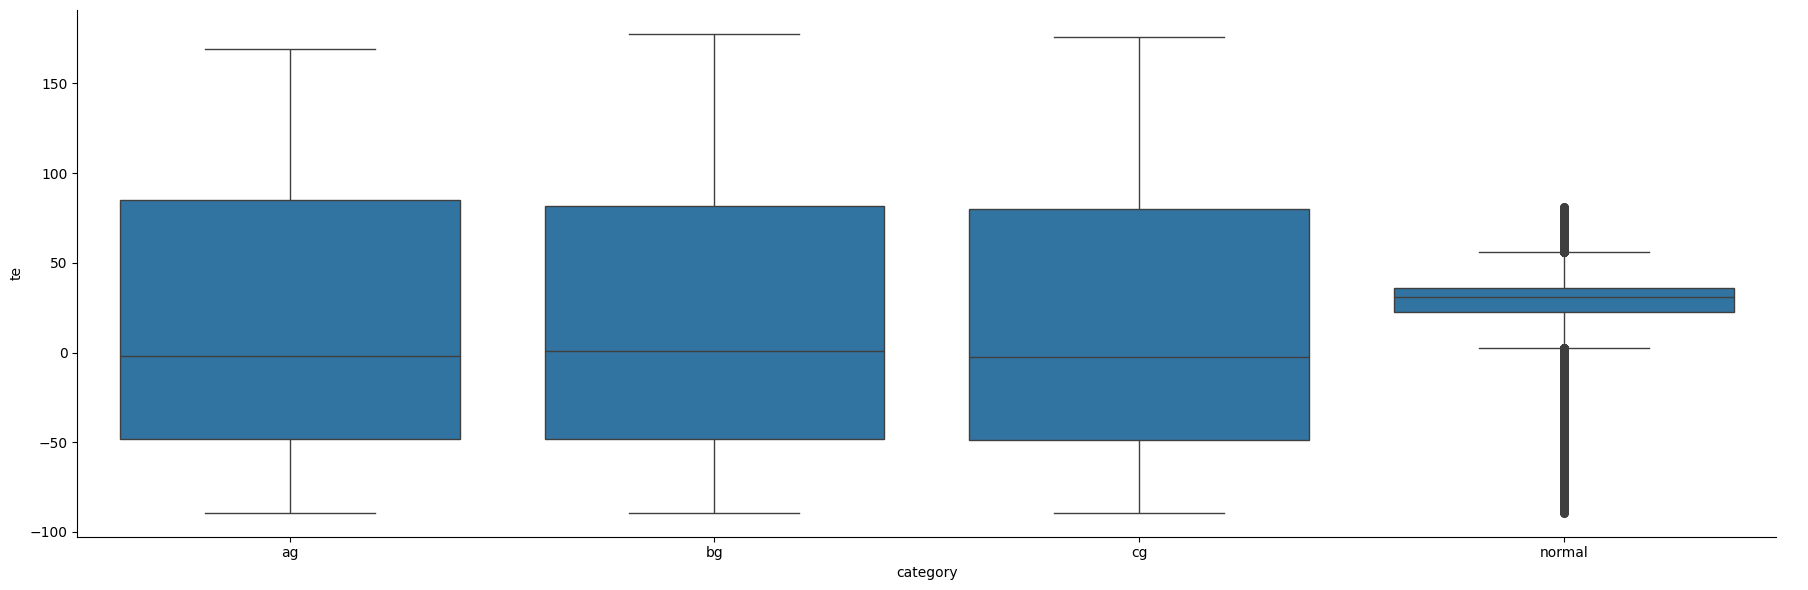

In [204]:
sns.catplot(data=df, x='category', y='te', kind='box', height=6, aspect=3)

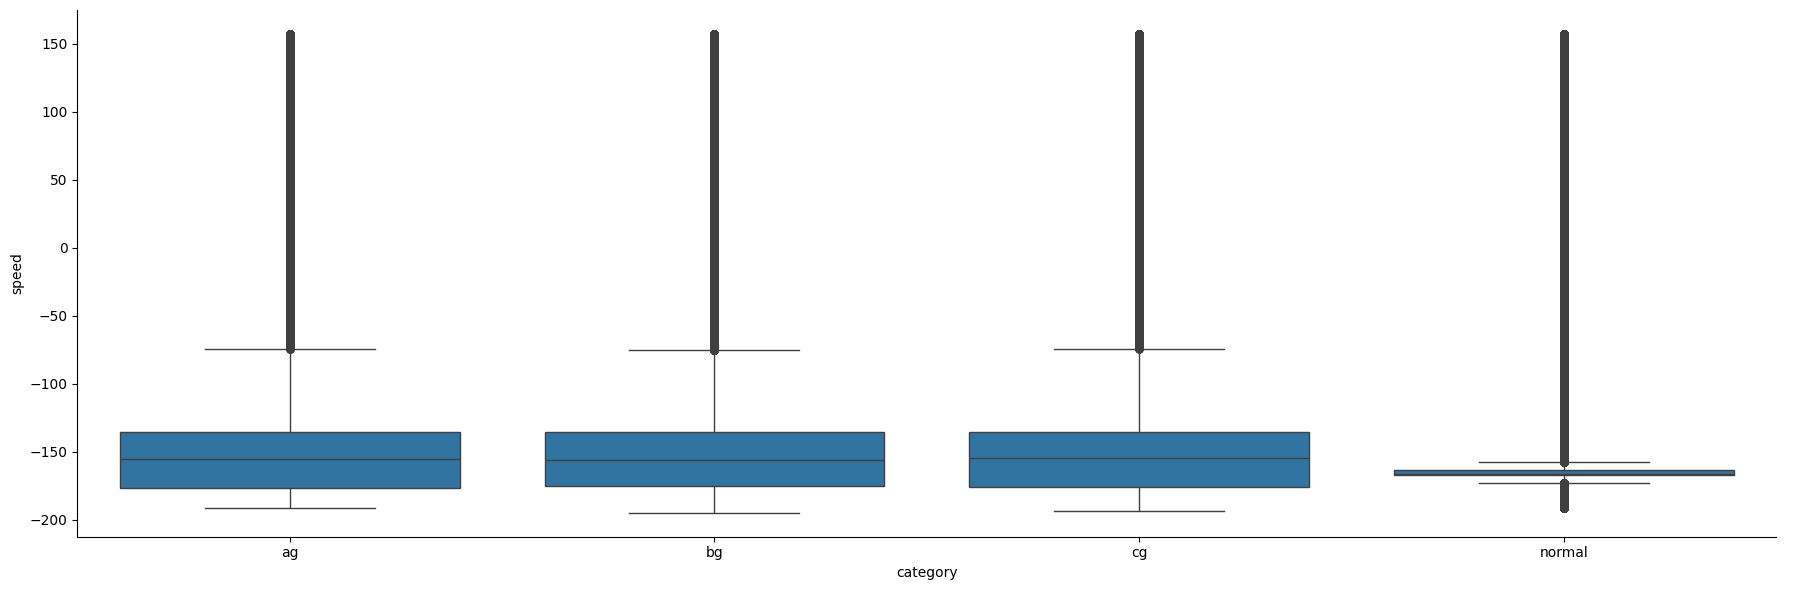

In [205]:
sns.catplot(data=df, x='category', y='speed', kind='box', height=6, aspect=3)

LabelEncoder, чтобы могли вывести heatmap

In [4]:
label_category = LabelEncoder()
df['category'] = label_category.fit_transform(df['category'])
df.head()

,time,ia,ib,ic,speed,te,tm,iaf,ibf,icf,voltage,category
0,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,157.079633,0.000000e+00,29.246105,0.0,0.0,0.0,0.0,2
1,3.155444e-30,0.000000e+00,-0.000000e+00,0.000000e+00,157.079633,0.000000e+00,29.246105,0.0,0.0,0.0,0.0,2
2,5.421011e-20,8.626609e-16,8.632077e-16,-1.725869e-15,157.079633,-1.102974e-38,29.246105,0.0,0.0,0.0,0.0,2
3,5.421011e-20,8.626609e-16,8.632077e-16,-1.725869e-15,157.079633,-1.102974e-38,29.246105,0.0,0.0,0.0,0.0,2
4,5.421011e-20,8.626609e-16,8.632077e-16,-1.725869e-15,157.079633,-1.102974e-38,29.246105,0.0,0.0,0.0,0.0,2


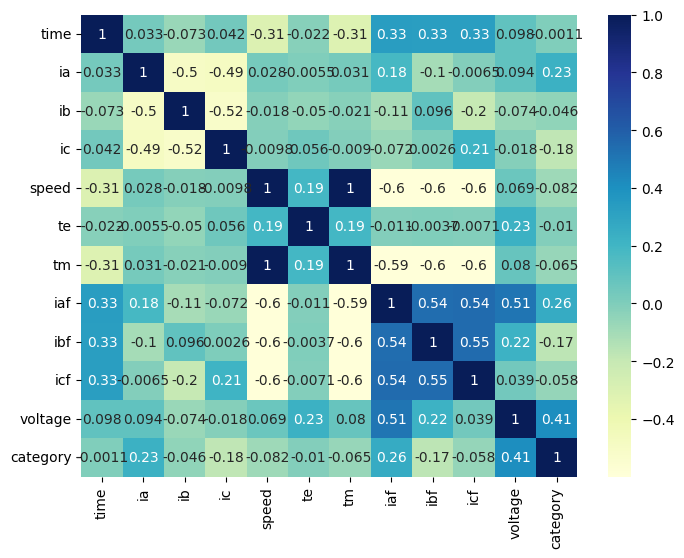

In [5]:
plt.figure(figsize=(8,6))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Подготовка данных

In [6]:
# Признаки и метки
X = df.drop(columns=["time", "category"])
y = df["category"]

In [7]:
# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True
)

Тестируем K ближайших соседей

In [11]:
cv = KFold(n_splits=5)
params = [{'n_neighbors': np.arange(1, 50, 6),
           'weights': ['uniform', 'distance'],
           'p': [1,2],
           'n_jobs': [-1]
          }]
knn_clf = KNeighborsClassifier()
clf_knn = GridSearchCV(knn_clf,
                      param_grid=params,
                      scoring='f1_macro',
                      cv=cv)
clf_knn.fit(X_train,y_train)

,estimator,KNeighborsClassifier()
,param_grid,"[{'n_jobs': [-1], 'n_neighbors': array([ 1, 7..., 37, 43, 49]), 'p': [1, 2], 'weights': ['uniform', 'distance']}]"
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,KFold(n_split...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,np.int64(49)


In [15]:
best_clf_knn = clf_knn.best_estimator_
y_pred = best_clf_knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76     12113
           1       0.76      0.81      0.79     12135
           2       0.78      0.81      0.79     12093
           3       0.84      0.80      0.82     12079
           4       0.84      0.80      0.82     12054
           5       0.86      0.80      0.83     12080
           6       0.86      0.80      0.83     12140

    accuracy                           0.80     84694
   macro avg       0.81      0.80      0.81     84694
weighted avg       0.81      0.80      0.81     84694



Тестируем RandomForest

In [234]:
params_forest = [{
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False],
    'n_jobs': [-1],
    'random_state': [42]
}]

# Инициализация модели
rf_clf = RandomForestClassifier()

# GridSearch
clf_forest = GridSearchCV(
    rf_clf,
    param_grid=params_forest,
    scoring='f1_macro',
    cv=cv,
    n_jobs=-1,
    verbose=0
)

# Обучение
clf_forest.fit(X_train, y_train)

KeyboardInterrupt: 

In [231]:
best_clf_forest = clf_forest.best_estimator_
y_pred = best_clf_forest.predict(X_test)
print(classification_report(y_test, y_pred))

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
params_svm = [{
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto'],
}]
 
# Конвейер: масштабирование + SVM
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# GridSearch
clf_svm = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=params_svm,
    scoring='f1_macro',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Обучение
clf_svm.fit(X_train, y_train)

In [232]:
    best_clf_svm = clf_svm.best_estimator_
    y_pred = best_clf_svm.predict(X_test)
    print(classification_report(y_test, y_pred))

NameError: name 'clf_svm' is not defined

In [30]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# --- Проверка CUDA ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# --- Файлы и метки классов ---
label_map = {
    "input_normal.csv": 0,
    "input_ag.csv": 1,
    "input_bg.csv": 2,
    "input_cg.csv": 3,
    "input_ab.csv": 4,
    "input_ac.csv": 5,
    "input_bc.csv": 6
}
features = ['ia', 'ib', 'ic', 'speed', 'te', 'tm', 'iaf', 'ibf', 'icf', 'voltage']
sequence_length = 50

# --- Создание временных окон ---
def create_sequences(df, label, seq_len):
    X_seq = []
    y_seq = []
    data = df[features].values
    for i in range(len(data) - seq_len):
        X_seq.append(data[i:i+seq_len])
        y_seq.append(label)
    return np.array(X_seq), np.array(y_seq)

X_all, y_all = [], []

for fname, label in label_map.items():
    df = pd.read_csv(fname)
    x_seq, y_seq = create_sequences(df, label, sequence_length)
    X_all.append(x_seq)
    y_all.append(y_seq)

X = np.vstack(X_all)
y = np.hstack(y_all)

# --- Масштабирование ---
X_shape = X.shape
X = X.reshape(-1, X.shape[-1])
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = X.reshape(X_shape)

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).to(device)

train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=64, shuffle=False)

# --- Модель CNN + BiLSTM ---
class CNN_BiLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, lstm_layers, output_dim):
        super(CNN_BiLSTM, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=input_dim, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(32)
        self.relu = nn.ReLU()

        self.lstm = nn.LSTM(input_size=32, hidden_size=hidden_dim, num_layers=lstm_layers,
                            batch_first=True, bidirectional=True)

        self.fc = nn.Sequential(
            nn.Linear(hidden_dim * 2, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, output_dim)
        )

    def forward(self, x):
        x = x.permute(0, 2, 1)         # [B, features, seq_len]
        x = self.relu(self.bn1(self.conv1(x)))
        x = x.permute(0, 2, 1)         # [B, seq_len, channels]
        lstm_out, _ = self.lstm(x)
        out = lstm_out[:, -1, :]       # последний шаг
        return self.fc(out)

# --- Инициализация ---
input_dim = X_train.shape[2]
model = CNN_BiLSTM(input_dim=input_dim, hidden_dim=64, lstm_layers=1, output_dim=7).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
epochs = 20

# --- Обучение ---
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        outputs = model(xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")

# --- Тестирование ---
model.eval()
all_preds = []
all_true = []

with torch.no_grad():
    for xb, yb in test_loader:
        preds = torch.argmax(model(xb), dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_true.extend(yb.cpu().numpy())

f1 = f1_score(all_true, all_preds, average='weighted')
print(f"\n✅ Weighted F1 Score: {f1:.4f}")


Using device: cuda
Epoch 1/20, Loss: 2711.6742
Epoch 2/20, Loss: 2498.3939
Epoch 3/20, Loss: 2369.2124
Epoch 4/20, Loss: 2189.8288
Epoch 5/20, Loss: 2169.7809
Epoch 6/20, Loss: 2159.5411
Epoch 7/20, Loss: 2149.2611
Epoch 8/20, Loss: 2141.2832
Epoch 9/20, Loss: 2127.6262
Epoch 10/20, Loss: 2123.6333
Epoch 11/20, Loss: 2122.2496
Epoch 12/20, Loss: 2122.6094
Epoch 13/20, Loss: 2117.8370
Epoch 14/20, Loss: 2109.8104
Epoch 15/20, Loss: 2112.6769
Epoch 16/20, Loss: 2104.1745
Epoch 17/20, Loss: 2107.3004
Epoch 18/20, Loss: 2101.5815
Epoch 19/20, Loss: 2126.2899
Epoch 20/20, Loss: 2116.0184

✅ Weighted F1 Score: 0.8479


In [31]:
print(classification_report(all_preds, all_true))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87     10080
           1       0.79      1.00      0.88      9611
           2       0.99      0.46      0.63     26169
           3       0.79      0.99      0.88      9620
           4       0.80      1.00      0.89      9698
           5       0.81      1.00      0.90      9844
           6       0.79      1.00      0.88      9602

    accuracy                           0.83     84624
   macro avg       0.83      0.92      0.85     84624
weighted avg       0.86      0.83      0.80     84624

